<a href="https://colab.research.google.com/github/Mehrab4khan/GIT_CSE440_GRP13/blob/main/CSE445_6_GRP14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [7]:
cd drive/MyDrive/sttext

[Errno 2] No such file or directory: 'drive/MyDrive/sttext'
/content


In [8]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.5 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer

In [10]:
data_url = "http://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"
data_path = keras.utils.get_file("LJSpeech-1.1", data_url, untar=True)


2748572632/2748572632 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


In [11]:
wavs_path = data_path + "/wavs/"
metadata_path = data_path + "/metadata.csv"

In [12]:
metadata_df = pd.read_csv(metadata_path, sep="|", header =None, quoting=3)

In [13]:
metadata_df.tail()

,0,1,2
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...
13099,LJ050-0278,the recommendations we have here suggested wou...,the recommendations we have here suggested wou...


In [14]:
metadata_df.head(10)

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
5,LJ001-0006,"And it is worth mention in passing that, as an...","And it is worth mention in passing that, as an..."
6,LJ001-0007,"the earliest book printed with movable types, ...","the earliest book printed with movable types, ..."
7,LJ001-0008,has never been surpassed.,has never been surpassed.
8,LJ001-0009,"Printing, then, for our purpose, may be consid...","Printing, then, for our purpose, may be consid..."
9,LJ001-0010,"Now, as all books not primarily intended as pi...","Now, as all books not primarily intended as pi..."


In [15]:
metadata_df.columns = ["file_name" , "transcription" , "normalized_transcription"]
metadata_df = metadata_df[["file_name" , "normalized_transcription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(30)

,file_name,normalized_transcription
0,LJ046-0196,"were filed on a geographic basis, and could co..."
1,LJ041-0011,Several witnesses testified that Lee Oswald wa...
2,LJ016-0165,three fingers might have been inserted between...
3,LJ010-0224,No serious importance could be attached to the...
4,LJ001-0148,Here once more the almost invariable modern pr...
5,LJ026-0058,and only after the completion of this process ...
6,LJ005-0129,"""a measure which must greatly tend to discoura..."
7,LJ049-0158,These informal and part-time arrangements led ...
8,LJ009-0270,A worse case still was that of William Bousfie...
9,LJ015-0186,and received his sentence of transportation fo...


In [41]:


split = int(len(metadata_df) * 0.80)
split1= int(len(metadata_df) * 0.90)
df_train = metadata_df[:split]
df_val = metadata_df[split:split1]
df_test = metadata_df[split1:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the training set: {len(df_val)}")
print(f"Size of the training set: {len(df_test)}")


Size of the training set: 10480
Size of the training set: 1310
Size of the training set: 1310


In [42]:
characters = [x for x in "abcdefghijklmnopqrstuvwxyz' "]
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")

num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)
print(
    f"The vocabulary = {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary = ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", ' '] (size =29)


In [43]:
char_to_num

<StringLookup name=string_lookup_2, built=False>

In [44]:
frame_length = 256
frame_step = 160
fft_length = 384

def encode_single_sample(wav_file, label):
    file = tf.io.read_file(wavs_path + wav_file + ".wav")

    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)

    audio = tf.cast(audio, tf.float32)

    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )

    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    label = tf.strings.lower(label)

    label = tf.strings.unicode_split(label, input_encoding="UTF-8")

    label = char_to_num(label)

    return spectrogram, label


In [45]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_test["file_name"]), list(df_test["normalized_transcription"]))
)
test_dataset = (
    test_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

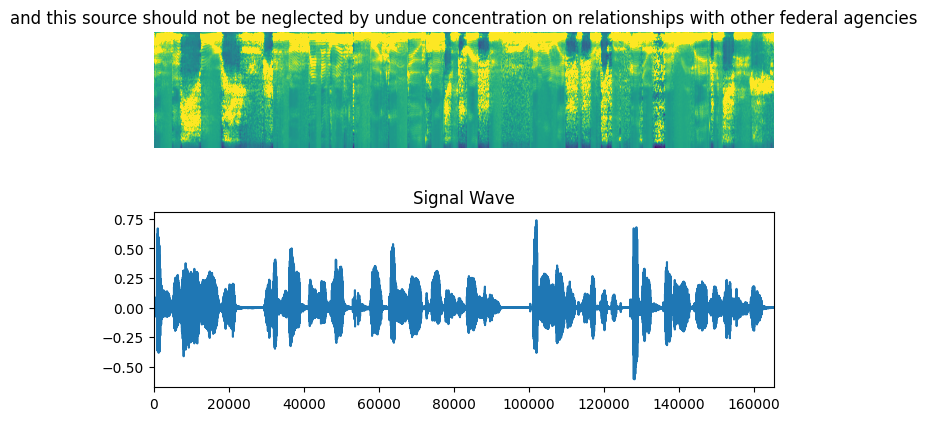

In [46]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
  spectrogram = batch[0][0].numpy()
  spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
  label = batch[1][0]
  label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
  ax = plt.subplot(2, 1, 1)
  ax.imshow(spectrogram, vmax=1)
  ax.set_title(label)
  ax.axis("off")
  file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
  audio, _ = tf.audio.decode_wav(file)
  audio = audio.numpy()
  ax = plt.subplot(2, 1, 2)
  ax.plot(audio)
  ax.set_title("Signal Wave")
  ax.set_xlim(0,len(audio))
  display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [53]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
    input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
    label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [54]:
def build_model(input_dim,output_dim, rnn_layers=5, rnn_units=128):
    input_spectogram = layers.Input((None, input_dim), name="input")

    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectogram)

    x = layers.Conv2D(
      filters=32,
      kernel_size=[11, 41],
      strides=[2, 2],
      padding="same",
      use_bias=False,
      name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)

    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)

    x = layers.Reshape(target_shape=(-1, x.shape[-2] * x.shape[-1]))(x)

    for i in range(1, rnn_layers + 1):
      recurrent = layers.GRU(
          units=rnn_units,
          activation="tanh",
          recurrent_activation="sigmoid",
          use_bias=True,
          return_sequences=True,
          reset_after=True,
          name=f"gru_{i}",
      )
      x = layers.Bidirectional(
          recurrent, name=f"bidirectional_{i}", merge_mode="concat"
      )(x)
      if i < rnn_layers:
        x = layers.Dropout(rate=0.5)(x)

    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)

    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    model = keras.Model(input_spectogram, output, name="DeepSpeech_2")
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=opt, loss=CTCLoss)
    return model

model = build_model(
      input_dim=fft_length // 2 + 1,
      output_dim=char_to_num.vocabulary_size(),
      rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                             │ (None, None, 193)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ expand_dim (Reshape)                           │ (None, None, 193, 1)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1 (Conv2D)                                │ (None, None, 97, 32)                │              14,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_bn (BatchNormalization)                 │ (None, None, 97, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_relu (ReLU)                             │ (None, None, 97, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2 (Conv2D)                                │ (None, None, 49, 32)                │             236,544 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_bn (BatchNormalization)                 │ (None, None, 49, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_relu (ReLU)                             │ (None, None, 49, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape_6 (Reshape)                            │ (None, None, 1568)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_1 (Bidirectional)                │ (None, None, 1024)                  │           6,395,904 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_30 (Dropout)                           │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_2 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_31 (Dropout)                           │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_3 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_32 (Dropout)                           │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_4 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_33 (Dropout)                           │ (None, None, 1024)                  │                   0 │
├───

 Total params: 26,626,430 (101.57 MB)

 Trainable params: 26,626,302 (101.57 MB)

 Non-trainable params: 128 (512.00 B)

In [55]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

    class CallbackEval (keras.callbacks.Callback):

        def __init__(self, dataset):
            super().__init__()
            self.dataset = dataset

        def on_epoch_end(self, epoch: int, logs=None):
            predictions = []
            targets = []
            for batch in self.dataset:
                X, y = batch
                batch_predictions = model.predict(X)
                batch_predictions = decode_batch_predictions(batch_predictions)
                predictions.extend(batch_predictions)
                for label in y:
                    label = (
                        tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                    )
                    targets.append(label)
            wer_score = wer(targets, predictions)
            print("-" * 100)
            print(f"Word Error Rate: {wer_score:.4f}")
            print("-" * 100)
            for i in np.random.randint(0, len(predictions), 2):
                print(f"Target    : {targets[i]}")
                print(f"Prediction: {predictions[i]}")
                print("-" * 100)


In [ ]:
epochs = 5


history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,

)

Epoch 1/5


In [33]:
predictions = []
targets = []
for batch in validation_dataset:
  x, y = batch
  batch_predictions = model.predict(x)
  batch_predictions = decode_bathc_predictions(bathc_predicitons)
  predictions.extend(batch_predictions)
  for label in y:
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("uft-8")
    targets.append(label)
wer_score = wer(targets,predicitons)
print("-"*100)
for i in np.random.randint(0, len(predicitons), 5):
  print(f"Target: {targets[i]}")
  print(f"Prediction: {predictions[i]}")
  print("-" * 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step


KeyboardInterrupt: 